In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, 


nRowsRead = 1000 

df1 = pd.read_csv('complete4.csv', delimiter=',', nrows = nRowsRead,encoding= 'unicode_escape',engine='python')
df1.dataframeName = 'complete4.csv'
nRow, nCol = df1.shape


There are 99 rows and 39 columns


In [31]:
df1.head(5)

,day,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,...,temperature,weather,feels.like,wind,humidity,chance,amount,uv,sunrise,sunset
0,16 10 2020,0,6,2.75,4.0,1,12,456.47,4.09,402.86,...,13/6°C,Mostly sunny.,11 °C,13 km/h,63%,5%,-,0 (Low),7:26,18:04
1,17 10 2020,0,3,5.00,7.6,4,5,410.48,3.53,414.00,...,12/8°C,Sprinkles early. Partly cloudy.,11 °C,9 km/h,69%,42%,0.5 mm,0 (Low),7:28,18:02
2,18 10 2020,0,5,5.00,9.4,6,9,386.45,3.39,380.00,...,14/10°C,Partly cloudy.,12 °C,8 km/h,65%,6%,-,0 (Low),7:30,18:00
3,19 10 2020,0,4,7.00,7.8,5,9,380.00,3.03,380.00,...,13/8°C,High level clouds.,11 °C,17 km/h,68%,6%,-,0 (Low),7:31,17:57
4,20 10 2020,0,2,5.00,5.1,2,13,385.00,2.59,388.33,...,15 / 12 °C,Light showers. Mostly cloudy.,14 °C,23 km/h,81%,74%,2.5 mm,0 (Low),7:33,17:55


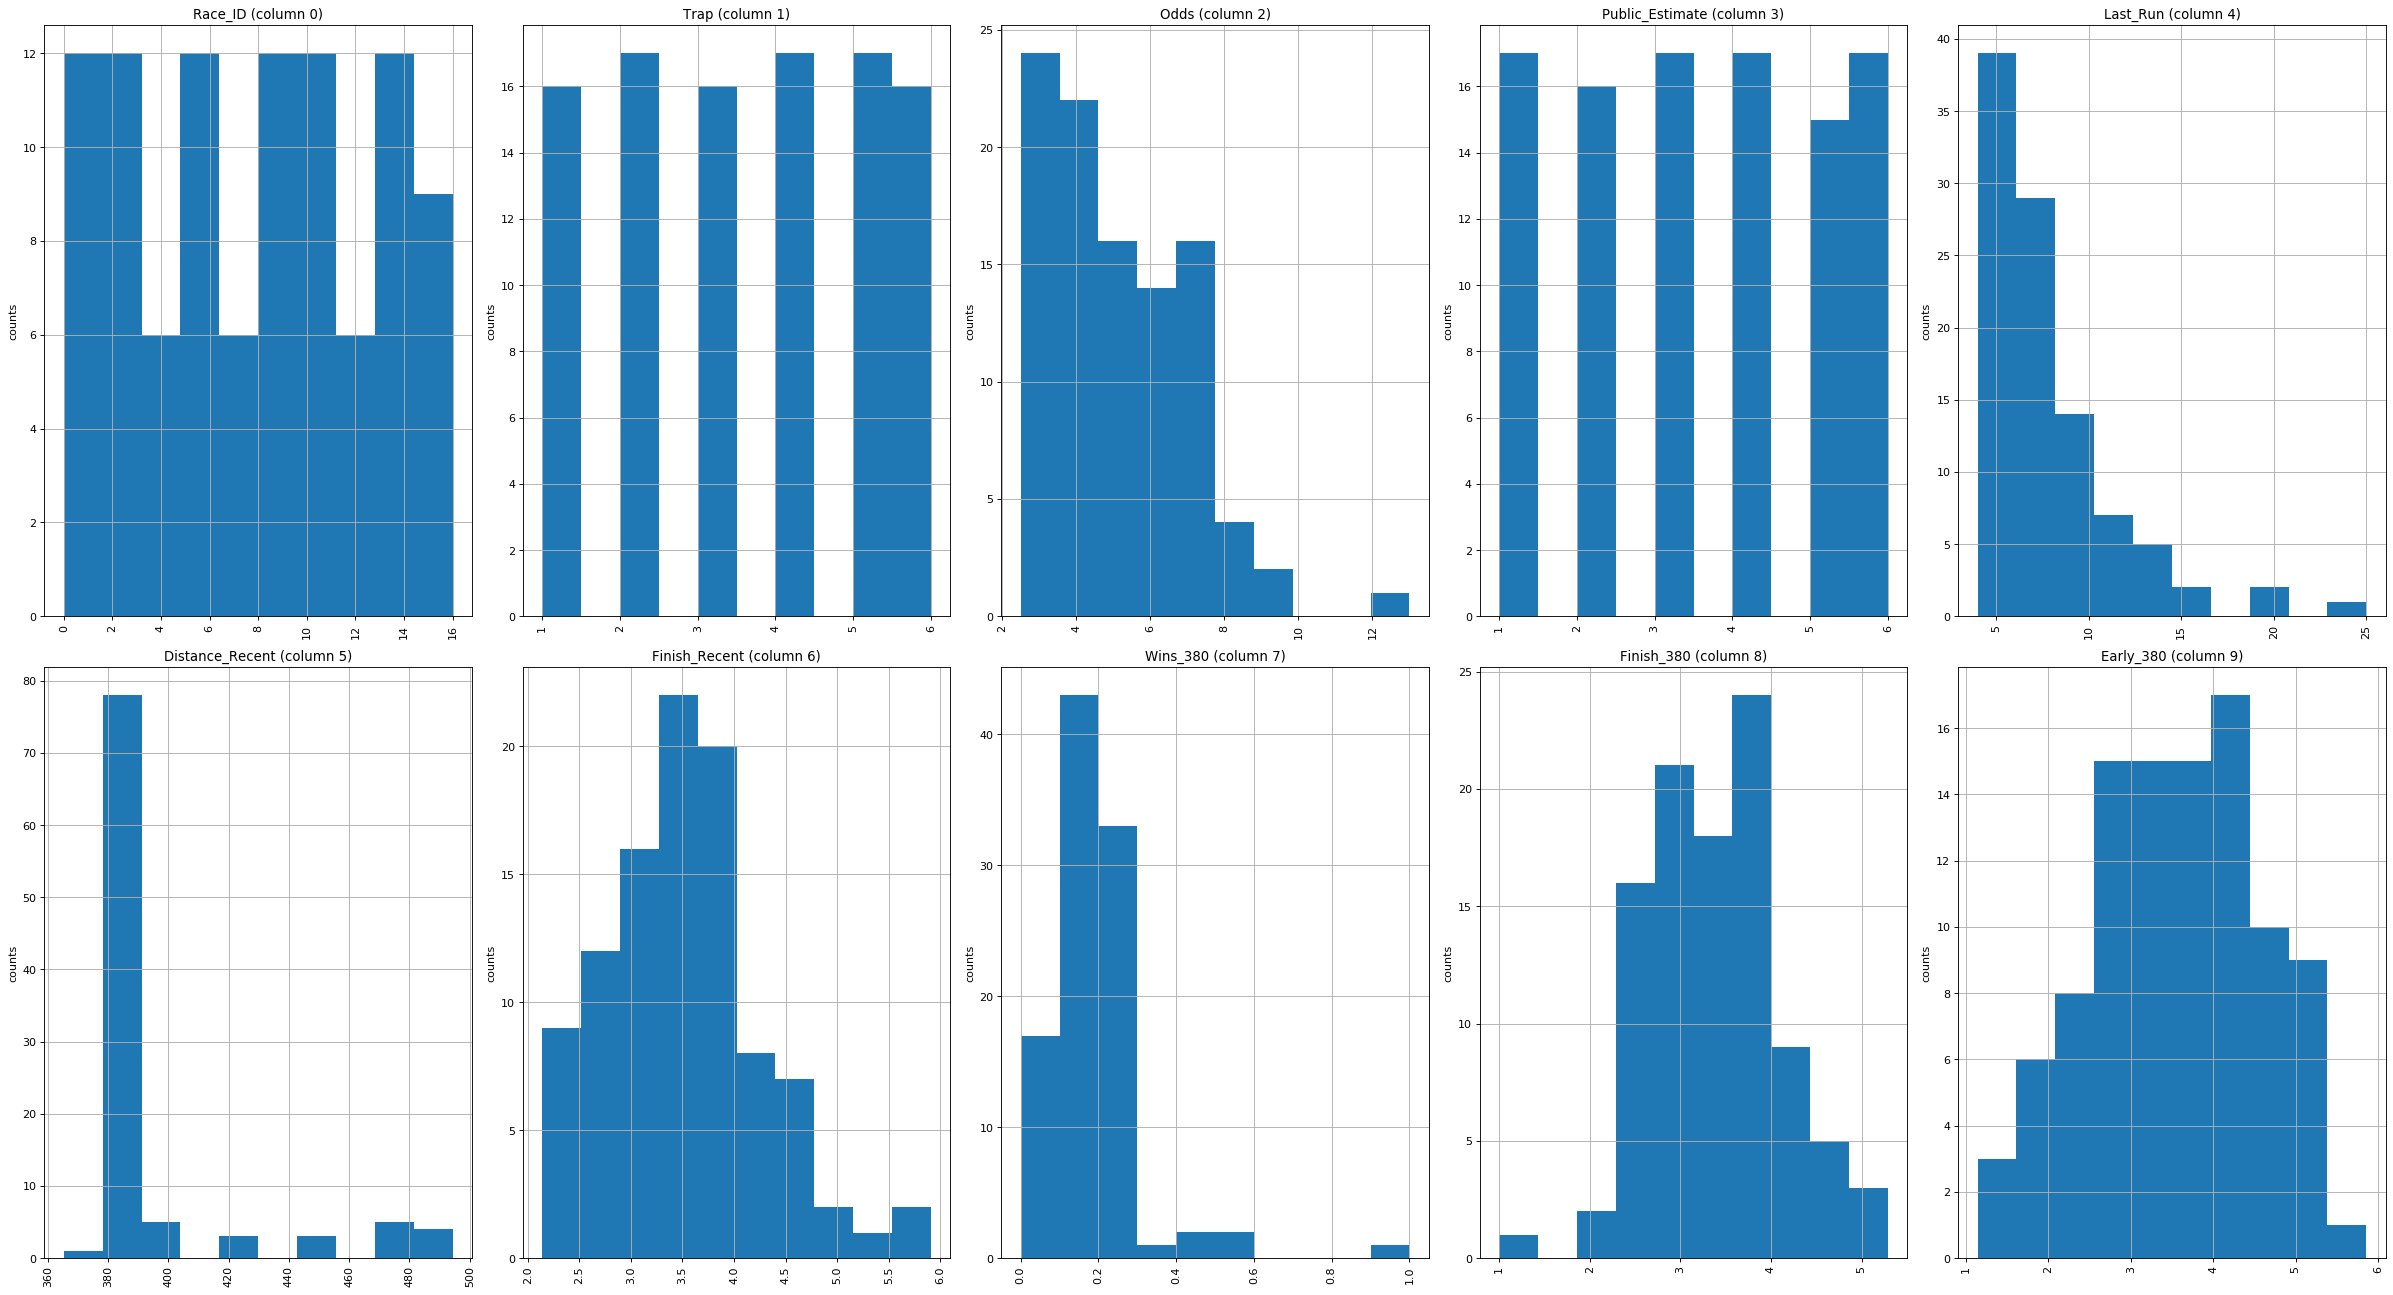

In [32]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

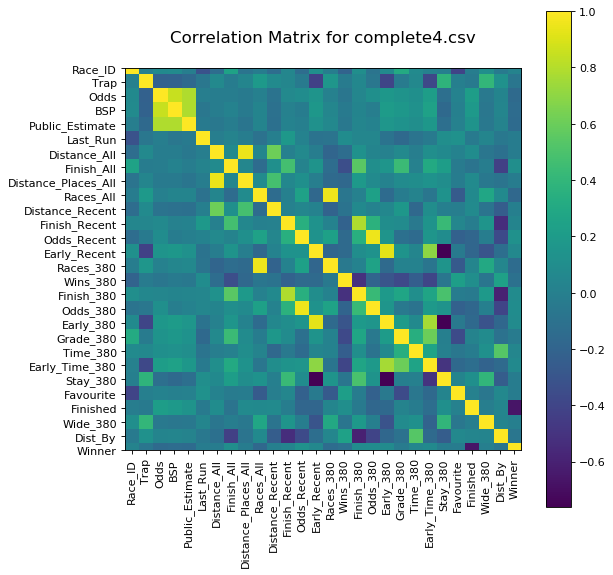

In [19]:
plotCorrelationMatrix(df1, 8)

In [27]:
features = ['Trap', 'BSP', 'Time_380', 'Finish_Recent', 'Finish_All', 'Stay_380',\
            'Races_All','Odds_Recent','Odds_380', 'Distance_Places_All', 'Dist_By',\
            'Races_380', 'Odds','Last_Run','Early_Time_380', 'Early_Recent' ,\
            'Distance_All', 'Wins_380', 'Grade_380','Finish_380','Early_380',\
            'Distance_Recent', 'Public_Estimate','Wide_380', 'Favourite','temperature','wind','humidity']
# Target
target = ['Finished']

In [28]:
df1[features].corr()

,Trap,BSP,Time_380,Finish_Recent,Finish_All,Stay_380,Races_All,Odds_Recent,Odds_380,Distance_Places_All,...,Early_Recent,Distance_All,Wins_380,Grade_380,Finish_380,Early_380,Distance_Recent,Public_Estimate,Wide_380,Favourite
Trap,1.000000,-0.205067,0.059014,0.047093,-0.021159,0.384017,0.186988,-0.045412,-0.060274,0.038393,...,-0.423723,0.064382,-0.029689,-0.029697,0.055101,-0.392397,0.082258,-0.157244,0.406651,-0.004288
BSP,-0.205067,1.000000,0.131632,0.010657,0.020627,-0.157488,0.033785,-0.022961,-0.009021,-0.043958,...,0.169821,-0.016015,-0.042069,0.168129,0.035380,0.204096,-0.106082,0.788469,-0.066422,0.002187
Time_380,0.059014,0.131632,1.000000,-0.050038,0.012814,0.006584,0.027039,-0.146600,-0.092844,0.100466,...,0.041746,-0.009405,-0.235124,0.342131,0.112202,0.076119,-0.167386,0.110197,0.121124,-0.062053
Finish_Recent,0.047093,0.010657,-0.050038,1.000000,0.473993,0.431066,0.008334,0.348776,0.371312,0.052173,...,0.134215,0.003254,-0.209519,0.090414,0.789828,0.101604,0.015321,0.016727,0.147050,0.049930
Finish_All,-0.021159,0.020627,0.012814,0.473993,1.000000,0.221933,-0.141958,0.024401,0.110891,0.046133,...,0.146063,0.078822,-0.339248,0.442004,0.550361,0.159330,0.115630,-0.015793,-0.014595,-0.028261
Stay_380,0.384017,-0.157488,0.006584,0.431066,0.221933,1.000000,0.138168,0.093635,0.140892,0.103183,...,-0.754851,0.072130,-0.072858,-0.000849,0.492814,-0.761698,0.001491,-0.116048,0.397810,0.031310
Races_All,0.186988,0.033785,0.027039,0.008334,-0.141958,0.138168,1.000000,0.245454,0.240286,0.084798,...,-0.163178,0.041946,-0.067627,-0.021325,0.013171,-0.146137,-0.139739,0.034030,0.283584,-0.254650
Odds_Recent,-0.045412,-0.022961,-0.146600,0.348776,0.024401,0.093635,0.245454,1.000000,0.958645,0.114189,...,0.137518,0.065192,-0.156035,-0.112208,0.346252,0.152149,0.045489,0.001679,-0.015392,-0.211630
Odds_380,-0.060274,-0.009021,-0.092844,0.371312,0.110891,0.140892,0.240286,0.958645,1.000000,0.080135,...,0.137304,0.031360,-0.195209,-0.049375,0.425640,0.157926,0.016411,0.019814,0.001836,-0.216899
Distance_Places_All,0.038393,-0.043958,0.100466,0.052173,0.046133,0.103183,0.084798,0.114189,0.080135,1.000000,...,-0.011371,0.947548,-0.168214,0.087757,0.182003,0.019067,0.478545,-0.080017,-0.057435,-0.025045


In [29]:
df1[['BSP','Odds','Public_Estimate','Finished']].corr()

,BSP,Odds,Public_Estimate,Finished
BSP,1.000000,0.851508,0.788469,0.186013
Odds,0.851508,1.000000,0.792098,0.221040
Public_Estimate,0.788469,0.792098,1.000000,0.144023
Finished,0.186013,0.221040,0.144023,1.000000


In [ ]:
#removing unnnecesary variables